In [57]:
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pandas.read_json("../json/tagged_remote_sensing_2017.json", orient="records")

In [96]:
def draw_2d(x, y, cluster, centers=None, labels=["First", "Second"], figsize=(6, 4)):
    fig = plt.figure(figsize=figsize)
    plot_2d = fig.add_subplot(111)

    plot_2d.set_xlabel(labels[0])
    plot_2d.set_ylabel(labels[1])

    plot_2d.scatter(
        x, 
        y, 
        c=cluster, 
        cmap="brg", 
        alpha=0.6
    )
    
    if centers is not None:
        # Draw white circles at cluster centers
        plot_2d.scatter(centers[:, 0], 
                        centers[:, 1], 
                        marker='o',
                        c="white", 
                        alpha=1, 
                        s=200, 
                        edgecolor='k')
        # Draw number of a cluster center
        for i, c in enumerate(centers):
            plot_2d.scatter(c[0], 
                            c[1],
                            marker=f"${i}$", 
                            c="black",
                            alpha=1, 
                            s=50, 
                            edgecolor='k')
            
    return fig

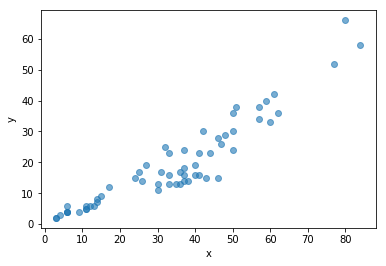

In [94]:
fig_1 = draw_2d(data["shortwave_infrared_1"], 
                data["shortwave_infrared_2"], 
                None, 
                labels=["x", "y"])
fig_1.savefig("pdf/k_means_figure_1.pdf", 
              dpi=600,
              format="pdf", 
              facecolor="none", 
              alpha=0, 
              edgecolor="none", 
              bbox_inches="tight",
              orientation="portrait")

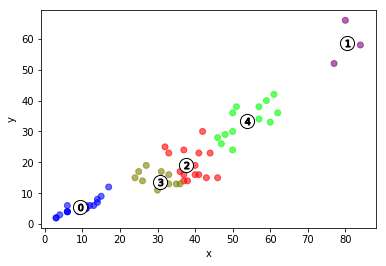

In [95]:
k = KMeans(n_clusters=5, init="random", max_iter=1, random_state=1).fit(
        data[["shortwave_infrared_1", "shortwave_infrared_2"]]
    )
fig_2 = draw_2d(data["shortwave_infrared_1"], 
                data["shortwave_infrared_2"], 
                k.labels_, 
                k.cluster_centers_,
                labels=["x", "y"])
fig_2.savefig("pdf/k_means_figure_2.pdf",
              dpi=600,
              format="pdf", 
              facecolor="none", 
              alpha=0, 
              edgecolor="none",
              bbox_inches="tight",
              orientation="portrait")